In [1]:
# 简单神经网络，后向传播算法及实现
# http://blog.csdn.net/u014595019/article/details/52557623
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 构造各个分类
def inputs():
    data = []
    radius = [0,50]
    for i in range(1000):  # 生成10k个点
        catg = random.randint(0,1)  # 决定分类
        r = random.random()*10
        arg = random.random()*360
        len = r + radius[catg]
        x_c = math.cos(math.radians(arg))*len
        y_c = math.sin(math.radians(arg))*len
        x = random.random()*30 + x_c
        y = random.random()*30 + y_c
        data.append((x,y,catg))
    return data

In [3]:
def predict(input,Whx,Wyh,bh,by):
    """推断模型"""
    # print('-----------------')
    # print(input)
    h_z = np.dot(Whx, input) + bh   # 线性求和
    h_a = 1/(1+np.exp(-1*h_z))      # 经过sigmoid激活函数
    y_z = np.dot(Wyh, h_a) + by
    y_a = 1/(1+np.exp(-1*y_z))
    # print(y_a)
    tag = np.argmax(y_a)
    return tag

def test(train_set, test_set, Whx, Wyh, bh, by):
    """损失函数"""
    train_tag = [int(x) for x in train_set[:,2]]
    test_tag = [int(x) for x in test_set[:,2]]
    train_pred = []
    test_pred = []

    for i,d in enumerate(train_set):
        input = train_set[i:i+1,0:2].T
        tag = predict(input,Whx,Wyh,bh,by)
        train_pred.append(tag)
    for i,d in enumerate(test_set):
        input = test_set[i:i+1,0:2].T
        tag = predict(input,Whx,Wyh,bh,by)
        test_pred.append(tag)
    # print(train_tag)
    # print(train_pred)
    train_err = 0
    test_err = 0
    for i in range(train_pred.__len__()):
        if train_pred[i]!=int(train_tag[i]):
            train_err += 1
    for i in range(test_pred.__len__()):
        if test_pred[i]!=int(test_tag[i]):
            test_err += 1
    # print(test_tag)
    # print(test_pred)
    train_ratio = train_err / train_pred.__len__()
    test_ratio = test_err / test_pred.__len__()
    return train_err,train_ratio,test_err,test_ratio

def train(input, output, Whx, Wyh, bh, by):
    """
    完成神经网络的训练过程
    :param input:   输入列向量， 例如 [x,y].T
    :param output:  输出列向量, 例如[0,1,0,0].T
    :param Whx:     x->h 的参数矩阵
    :param Wyh:     h->y 的参数矩阵
    :param bh:      x->h 的偏置向量
    :param by:      h->y 的偏置向量
    :return:
    """
    h_z = np.dot(Whx, input) + bh   # 线性求和
    h_a = 1/(1+np.exp(-1*h_z))      # 经过sigmoid激活函数
    y_z = np.dot(Wyh, h_a) + by
    y_a = 1/(1+np.exp(-1*y_z))
    c_y = (y_a-output)*y_a*(1-y_a)
    dWyh = np.dot(c_y, h_a.T)
    dby = c_y
    c_h = np.dot(Wyh.T, c_y)*h_a*(1-h_a)
    dWhx = np.dot(c_h,input.T)
    dbh = c_h
    return dWhx,dWyh,dbh,dby,c_y 


In [4]:
input_dim   = 2
output_dim  = 2
hidden_size = 200
Whx = np.random.randn(hidden_size, input_dim)*0.01
Wyh = np.random.randn(output_dim, hidden_size)*0.01
bh  = np.zeros((hidden_size, 1))
by  = np.zeros((output_dim, 1))

data = inputs()
ndata = np.array(data)

train_set = ndata[0:800,:]
test_set = ndata[800:1000,:]
train_ratio_list = []
test_ratio_list = []
for times in range(10000):
    i = times%train_set.__len__()
    
    input = train_set[i:i+1,0:2].T  # X
    tag = int(train_set[i,2])  # Y
    
    output = np.zeros((2,1))
    output[tag,0] = 1
    dWhx,dWyh,dbh,dby,c_y = train(input,output,Whx,Wyh,bh,by)
    if times%100==0:
        train_err,train_ratio,test_err,test_ratio = test(train_set,test_set,Whx,Wyh,bh,by)
        print('times:{t}\t train ratio:{tar}\t test ratio: {ter}'.format(tar=train_ratio,ter=test_ratio,t=times))
        train_ratio_list.append(train_ratio)
        test_ratio_list.append(test_ratio)

    for param, dparam in zip([Whx, Wyh, bh, by],
                             [dWhx,dWyh,dbh,dby]):
        param -= 0.01*dparam
        
for i,d in enumerate(ndata):
    input = ndata[i:i+1,0:2].T
    tag = predict(input,Whx,Wyh,bh,by)
    ndata[i,2] = tag

times:0	 train ratio:0.40125	 test ratio: 0.395
times:100	 train ratio:0.54875	 test ratio: 0.49
times:200	 train ratio:0.54875	 test ratio: 0.49
times:300	 train ratio:0.45125	 test ratio: 0.51
times:400	 train ratio:0.45125	 test ratio: 0.51
times:500	 train ratio:0.45125	 test ratio: 0.51
times:600	 train ratio:0.5425	 test ratio: 0.485
times:700	 train ratio:0.54875	 test ratio: 0.49
times:800	 train ratio:0.45125	 test ratio: 0.51
times:900	 train ratio:0.54875	 test ratio: 0.49
times:1000	 train ratio:0.41375	 test ratio: 0.375
times:1100	 train ratio:0.45125	 test ratio: 0.51
times:1200	 train ratio:0.45125	 test ratio: 0.51
times:1300	 train ratio:0.45125	 test ratio: 0.51
times:1400	 train ratio:0.38	 test ratio: 0.305
times:1500	 train ratio:0.405	 test ratio: 0.355
times:1600	 train ratio:0.45125	 test ratio: 0.51
times:1700	 train ratio:0.39	 test ratio: 0.34
times:1800	 train ratio:0.34875	 test ratio: 0.29
times:1900	 train ratio:0.45125	 test ratio: 0.51
times:2000	 trai

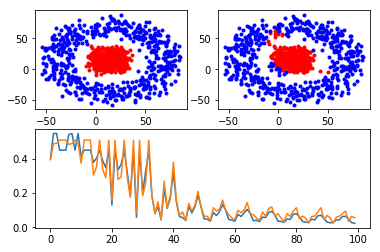

In [5]:
# show 
def plot_dots(data):
    data_asclass = [[] for i in range(2)]
    for d in data:
        data_asclass[int(d[2])].append((d[0],d[1]))
    colors = ['r.','b.','r.','b.']
    for i,d in enumerate(data_asclass):
        # print(d)
        nd = np.array(d)
        plt.plot(nd[:,0],nd[:,1],colors[i])
    plt.draw()
    
plt.subplot(221)
plot_dots(data)

plt.subplot(222)
plot_dots(ndata)

# plt.figure()
plt.subplot(212)
plt.plot(train_ratio_list)
plt.plot(test_ratio_list)
plt.show()